In [15]:

import pandas as pd
from sklearn import cluster, preprocessing
from sklearn.decomposition import PCA
import pylab as pl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tabulate import tabulate

"""
To check amount of NA values in any given column
-----
Usage
-----

count_na_in_col('URL')

"""
def count_na_in_col(df, colname):
    return(sum(pd.isnull(df[colname])))


def preprocess(df):
    df_fill_na = df.fillna(df.mean())
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df_fill_na)
    df_normalized = pd.DataFrame(np_scaled, columns=df_fill_na.columns)
    return(df_normalized)

def get_elbow_plot(df):
    Nc = range(1, 20)
    kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
    pl.plot(Nc,score)
    pl.xlabel('Number of Clusters')
    pl.ylabel('Score')
    pl.title('Elbow Curve')
    pl.show()

def plot_pca_2d(df, clusterObj):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    pl.scatter(pca_2d[:, 0], pca_2d[:, 1],c=clusterObj.labels_)
    pl.xlabel("PCA_1")
    pl.ylabel("PCA_2")
    pl.show()
    pca_table = pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2'])
    print(tabulate(pca_table, headers='keys', tablefmt='psql'))

# 3 Dimensional PCA variables
"""
Change composition of bed_df
bed_df = survey_raw_df[['GENBD','PEDBD','OBBD','ACULTBD']]
bed_df = bed_df.fillna(bed_df.mean())

"""
def plot_3d_cluster(df, clusterObj):
    pca_3 = PCA(n_components=3).fit(df)
    pca_3d = pca_3.transform(df)
    angle_1 = plt.figure()
    ax = angle_1.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 0], pca_3d[:, 1],pca_3d[:,2], c=clusterObj.labels_, marker='o')
    ax.set_xlabel('PC-1')
    ax.set_ylabel('PC-2')
    ax.set_zlabel('PC-3')

    angle_2 = plt.figure()
    ax = angle_2.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 1], pca_3d[:, 2],pca_3d[:,0], c=clusterObj.labels_, marker='o')
    ax.set_xlabel('PC-2')
    ax.set_ylabel('PC-3')
    ax.set_zlabel('PC-1')

    angle_3 = plt.figure()
    ax = angle_3.add_subplot(111, projection='3d')
    ax.scatter(pca_3d[:, 2], pca_3d[:, 0],pca_3d[:,1], c=clusterObj.labels_, marker='o')
    ax.set_xlabel('PC-3')
    ax.set_ylabel('PC-1')
    ax.set_zlabel('PC-2')

    plt.show()
    pca_table = pd.DataFrame(pca_3.components_,columns=df.columns,index = ['PC-1','PC-2','PC-3'])
    print(tabulate(pca_table, headers='keys', tablefmt='psql'))


def get_survey_df( feature_list, df):
    df_filtered_features = df[feature_list]
    df_pre = preprocess( df_filtered_features)
    get_elbow_plot(df_pre)
    return(df_pre)


def run_script(df, number_of_cluster):
    
    ########
    #KMEANS#
    ########
    kmeans= cluster.KMeans(n_clusters=number_of_cluster)
    kmeans.fit(df)
    plot_pca_2d(df, kmeans)
    plot_3d_cluster(df, kmeans)

    ## AGGOLOMETRIVE
    agglometrativeObj = cluster.AgglomerativeClustering(n_clusters=number_of_cluster).fit(df)
    plot_pca_2d(df, agglometrativeObj)
    plot_3d_cluster(df, agglometrativeObj)
    ## DBSCAN
    dbscanObj = cluster.DBSCAN(eps=0.25,min_samples=20).fit(df)
    plot_pca_2d(df, dbscanObj)
    plot_3d_cluster(df,dbscanObj)


/Users/agowda/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (0,66,73,185,223) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


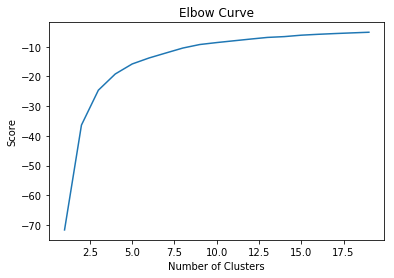

In [19]:
df = pd.read_csv('/Users/agowda/Downloads/Hospital Data.csv')


In [ ]:
df = get_survey_df(df, feature_list = ['PLNTA'
                        ,'ADEPRA'
                        ,'ASSNET'
                        ,'GFEET'
                        ,'CEAMT'])

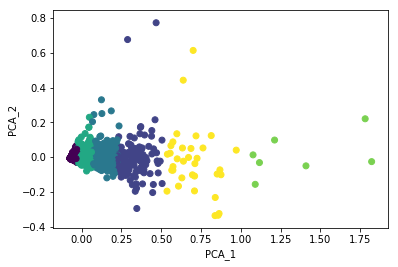

+------+-----------+-----------+-----------+----------+-----------+
|      |     PLNTA |    ADEPRA |    ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+-----------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187 | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394 | 0.864883 | -0.238227 |
+------+-----------+-----------+-----------+----------+-----------+


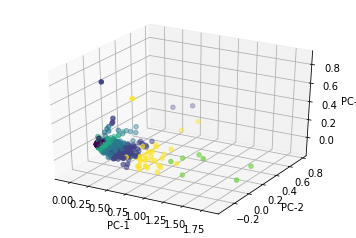

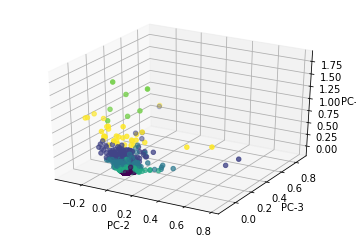

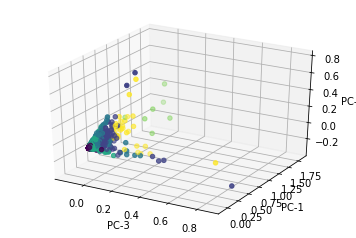

+------+-----------+-----------+------------+----------+-----------+
|      |     PLNTA |    ADEPRA |     ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+------------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187  | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394  | 0.864883 | -0.238227 |
| PC-3 | -0.121719 | -0.293091 |  0.0403879 | 0.20304  |  0.925433 |
+------+-----------+-----------+------------+----------+-----------+


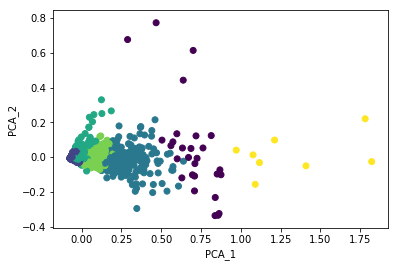

+------+-----------+-----------+-----------+----------+-----------+
|      |     PLNTA |    ADEPRA |    ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+-----------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187 | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394 | 0.864883 | -0.238227 |
+------+-----------+-----------+-----------+----------+-----------+


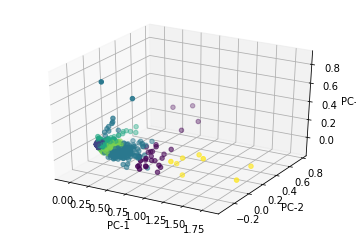

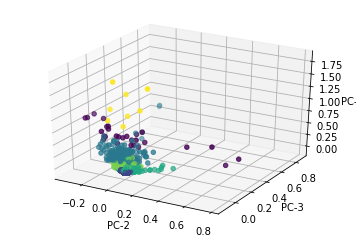

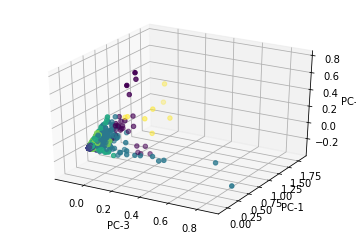

+------+-----------+-----------+------------+----------+-----------+
|      |     PLNTA |    ADEPRA |     ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+------------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187  | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394  | 0.864883 | -0.238227 |
| PC-3 | -0.121719 | -0.293091 |  0.0403879 | 0.20304  |  0.925433 |
+------+-----------+-----------+------------+----------+-----------+


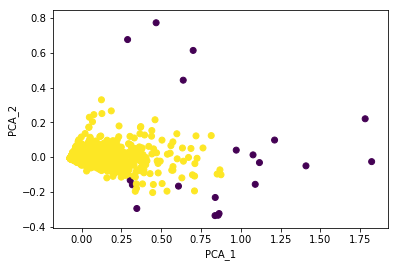

+------+-----------+-----------+-----------+----------+-----------+
|      |     PLNTA |    ADEPRA |    ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+-----------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187 | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394 | 0.864883 | -0.238227 |
+------+-----------+-----------+-----------+----------+-----------+


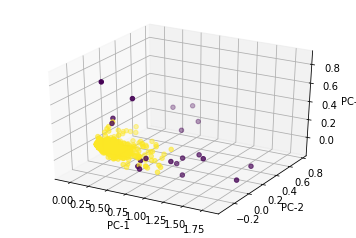

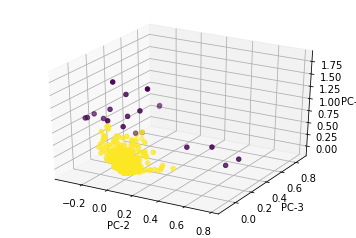

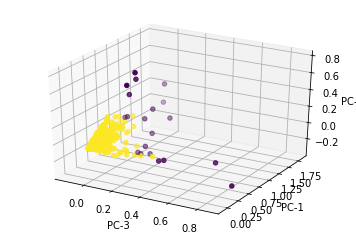

+------+-----------+-----------+------------+----------+-----------+
|      |     PLNTA |    ADEPRA |     ASSNET |    GFEET |     CEAMT |
|------+-----------+-----------+------------+----------+-----------|
| PC-1 |  0.520333 |  0.529218 |  0.490187  | 0.441623 |  0.11776  |
| PC-2 | -0.240265 | -0.102378 | -0.356394  | 0.864883 | -0.238227 |
| PC-3 | -0.121719 | -0.293091 |  0.0403879 | 0.20304  |  0.925433 |
+------+-----------+-----------+------------+----------+-----------+


In [20]:
run_script(df,number_of_cluster = 6)